<a href="https://colab.research.google.com/github/GianTheGoat/project_gss/blob/main/DS3001Project1Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/GianTheGoat/project_gss

Cloning into 'project_gss'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 36 (delta 14), reused 3 (delta 3), pack-reused 17
Receiving objects: 100% (36/36), 24.14 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

gss = pd.read_parquet("/content/project_gss/gss_chunk_3.parquet")
gss = gss.dropna(how = "all")

In [3]:
filt = gss.filter(items = ["year", "occ" "wrkstat", "wrkslf", "hrs1", "income06",
                           "degree", "marital", "happy", "partyid"],axis=1)
yrgss = filt[(filt["year"] == 2006) | (filt["year"] == 2008) | (filt["year"] == 2010)]
yrgss

,year,wrkslf,hrs1,income06,degree,marital,happy,partyid
0,2006,someone else,40.0,$110000 to $129999,high school,married,NaN,"independent (neither, no response)"
1,2006,someone else,NaN,$75000 to $89999,bachelor's,never married,pretty happy,"independent (neither, no response)"
2,2006,someone else,35.0,$60000 to 74999,bachelor's,divorced,pretty happy,not very strong republican
3,2006,someone else,50.0,$35000 to 39999,high school,never married,NaN,not very strong republican
4,2006,someone else,40.0,$75000 to $89999,bachelor's,married,very happy,not very strong republican
...,...,...,...,...,...,...,...,...
6822,2010,someone else,NaN,$150000 or over,bachelor's,married,pretty happy,strong republican
6823,2010,someone else,NaN,$12500 to 14999,high school,widowed,not too happy,strong republican
6824,2010,someone else,40.0,$20000 to 22499,high school,separated,very happy,not very strong democrat
6825,2010,someone else,49.0,$6 000 to 6 999,bachelor's,divorced,pretty happy,"independent (neither, no response)"


<Axes: xlabel='hrs1', ylabel='Density'>

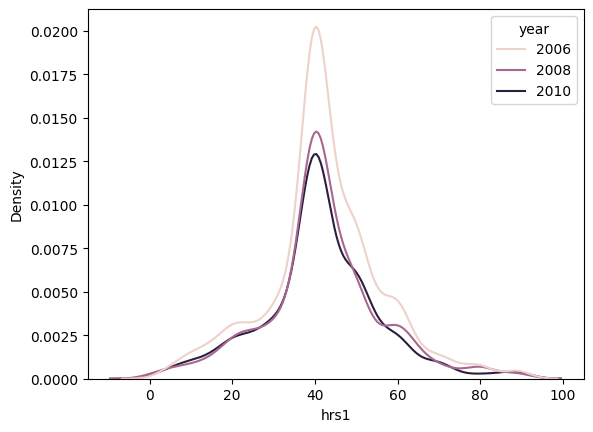

In [4]:
sns.kdeplot(data=yrgss,x="hrs1", hue = "year")

<Axes: xlabel='hrs1', ylabel='Density'>

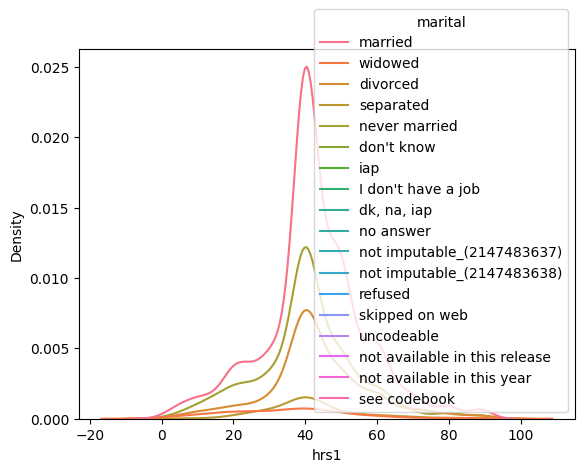

In [5]:
sns.kdeplot(data=yrgss,x="hrs1", hue = "marital")

[Text(0.5, 1.0, 'Time Use'), Text(0.5, 0, 'Year'), Text(0, 0.5, 'Proportion')]

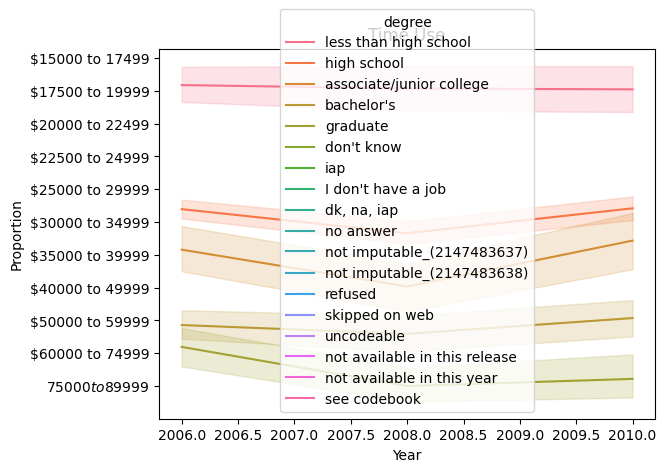

In [6]:
sns.lineplot(data=yrgss,x='year',y='income06', hue="degree", legend = "brief").set(title='Time Use',xlabel=
                                                                   'Year',ylabel='Proportion')

Bar graph incorporating happiness, income, and party affiliation:

<ipython-input-7-d43dfa15c166>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yrgss['partyid'] = yrgss['partyid'].astype(str)


<Axes: xlabel='partyid', ylabel='income06'>

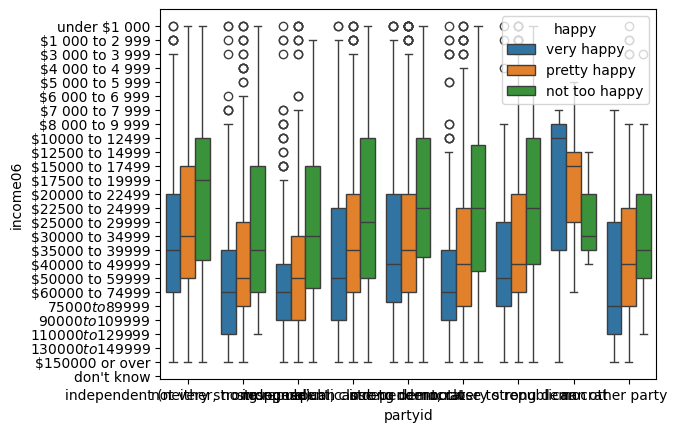

In [7]:
yrgss['partyid'] = yrgss['partyid'].astype(str)
sns.boxplot(yrgss, x = 'partyid', y = 'income06', hue = 'happy', hue_order = ['very happy', 'pretty happy', 'not too happy'])